This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2019). For additional details, please see the attached data dictionary in the ‘About’ section.

link: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

- Objetivo:

- Classificar se em determinada área pode acontecer um delito classificado como assalto.

## 1 - Carregamento dos dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('delitos_nyc.csv',sep=',')

In [3]:
dados.head()

,desc_instalacoes,ano,assalto,bairro,conclusao,data_da_ocorr,delito,desc_delito,dia,dia_da_semana,...,idade_vitima,latitude,loc_esp_delito,longitude,mes,nivel_delito,noite,raca_vitima,sexo_vitima,fds
0,OTHER,2006,0,Staten_Island,1,2006-01-01,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",1,domingo,...,65+,40.640577,dentro,-74.091387,1,crime,1,BLACK,F,0
1,RESIDENCE-HOUSE,2006,0,Staten_Island,1,2006-01-01,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",1,domingo,...,25-44,40.632779,dentro,-74.140630,1,crime,0,WHITE HISPANIC,M,0
2,RESIDENCE - APT. HOUSE,2006,0,Brooklyn,1,2006-01-01,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",1,domingo,...,65+,40.661964,dentro,-73.889912,1,crime,0,BLACK,M,0
3,COMMERCIAL BUILDING,2006,0,Brooklyn,1,2006-01-01,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",1,domingo,...,25-44,40.602071,dentro,-74.002692,1,crime,1,WHITE,M,0
4,RESIDENCE - APT. HOUSE,2006,0,Queens,1,2006-01-02,THEFT-FRAUD,"FRAUD,UNCLASSIFIED-FELONY",2,segunda,...,25-44,40.721998,dentro,-73.842636,1,crime,0,WHITE,M,0


In [4]:
dados[dados['assalto']==0].delito.value_counts()

HARRASSMENT 2                     90659
CRIMINAL MISCHIEF & RELATED OF    42784
OFF. AGNST PUB ORD SENSBLTY &     28864
MISCELLANEOUS PENAL LAW           12973
OFFENSES AGAINST PUBLIC ADMINI     6420
THEFT-FRAUD                        6330
CRIMINAL TRESPASS                  2188
ADMINISTRATIVE CODE                1333
FORGERY                             968
OFFENSES AGAINST THE PERSON         714
INTOXICATED & IMPAIRED DRIVING      566
ARSON                               138
FRAUDULENT ACCOSTING                137
OFFENSES INVOLVING FRAUD             84
Name: delito, dtype: int64

In [5]:
dados[dados['assalto']==1].delito.value_counts()

ASSAULT 3 & RELATED OFFENSES      58817
PETIT LARCENY                     24989
FELONY ASSAULT                    21289
ROBBERY                           17990
BURGLARY                          14007
GRAND LARCENY OF MOTOR VEHICLE     8523
PETIT LARCENY OF MOTOR VEHICLE       79
Name: delito, dtype: int64

In [6]:
dados.assalto.value_counts(normalize=True)

0    0.571302
1    0.428698
Name: assalto, dtype: float64

- FILTRANDO E SELECIONANDO DELITOS.

In [7]:
lista = ['ROBBERY','GRAND LARCENY OF MOTOR VEHICLE',
         'OFFENSES AGAINST PUBLIC ADMINI','THEFT-FRAUD','ADMINISTRATIVE CODE',
         'FORGERY','OFFENSES AGAINST THE PERSON','FRAUDULENT ACCOSTING','OFFENSES INVOLVING FRAUD']

dados = dados.set_index('delito')
dados = dados.loc[lista]
dados = dados.reset_index()

In [8]:
dados.assalto.value_counts(normalize=True)

1    0.62385
0    0.37615
Name: assalto, dtype: float64

- Selecionando as colunas para a modelagem.

In [15]:
dados_ml = dados[['hora','noite','dia','dia_da_semana','mes','fds',
                  'bairro','desc_instalacoes','sexo_vitima',
                  'latitude', 'longitude','conclusao','assalto']]

In [16]:
dados_ml = dados_ml.dropna()

In [17]:
dados_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42426 entries, 0 to 42498
Data columns (total 13 columns):
hora                42426 non-null int64
noite               42426 non-null int64
dia                 42426 non-null int64
dia_da_semana       42426 non-null object
mes                 42426 non-null int64
fds                 42426 non-null int64
bairro              42426 non-null object
desc_instalacoes    42426 non-null object
sexo_vitima         42426 non-null object
latitude            42426 non-null float64
longitude           42426 non-null float64
conclusao           42426 non-null int64
assalto             42426 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 4.5+ MB


In [19]:
dados_ml.head()

,hora,noite,dia,dia_da_semana,mes,fds,bairro,desc_instalacoes,sexo_vitima,latitude,longitude,conclusao,assalto
0,15,0,9,quinta,2,0,Bronx,STREET,F,40.809971,-73.917826,1,1
3,18,1,3,quarta,5,0,Bronx,STREET,F,40.876866,-73.861644,1,1
4,15,0,8,quarta,11,0,Bronx,STREET,M,40.811658,-73.921036,1,1
5,1,1,1,terca,5,0,Manhattan,OTHER,F,40.833957,-73.940740,1,1
6,20,1,9,quinta,8,0,Brooklyn,STREET,M,40.574825,-73.990927,1,1


- Tratando variáveis categóricas.

In [20]:
# dados_ml = pd.get_dummies(dados_ml)

In [21]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

dados_ml['dia_da_semana'] = lb.fit_transform(dados_ml['dia_da_semana'])
dados_ml['bairro'] = lb.fit_transform(dados_ml['bairro'])
dados_ml['desc_instalacoes'] = lb.fit_transform(dados_ml['desc_instalacoes'])
dados_ml['sexo_vitima'] = lb.fit_transform(dados_ml['sexo_vitima'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in dados_ml.columns:
  if col != "assalto":
    dados_ml[col] = scaler.fit_transform(np.array(dados_ml[col]).reshape(-1,1))

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
dados_ml.head()

,hora,noite,dia,dia_da_semana,mes,fds,bairro,desc_instalacoes,sexo_vitima,latitude,longitude,conclusao,assalto
0,0.323804,-1.039089,-0.722397,-0.534842,-1.213786,-0.399133,-1.263716,0.641037,-1.180381,0.822448,-0.028381,0.250072,1
3,0.751338,0.962382,-1.396760,-1.037560,-0.291369,-0.399133,-1.263716,0.641037,-1.180381,1.600079,0.691847,0.250072,1
4,0.323804,-1.039089,-0.834791,-1.037560,1.553466,-0.399133,-1.263716,0.641037,0.847184,0.842065,-0.069525,0.250072,1
5,-1.671359,0.962382,-1.621548,1.476031,-0.291369,-0.399133,0.388729,-1.047798,-1.180381,1.101281,-0.322126,0.250072,1
6,1.036362,0.962382,-0.722397,-0.534842,0.631048,-0.399133,-0.437493,0.641037,0.847184,-1.911027,-0.965494,0.250072,1


### Separando os dados de treino e teste.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = dados_ml.drop('assalto',axis=1)
Y = dados_ml['assalto']

In [25]:
X_treino, X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

## 4.2 **Testando algoritmos**

In [26]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi 62.41%


Text(33,0.5,'Real ( 1 ou 0)')

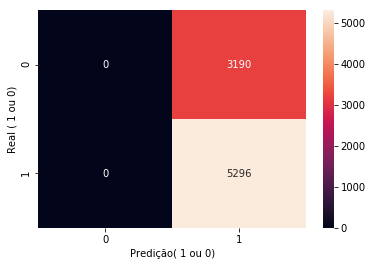

In [27]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [28]:
from sklearn.metrics import  roc_auc_score,roc_curve, classification_report
from sklearn import metrics

y_proba = dummy_clf.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:,1])

0.5

In [29]:
print(classification_report(Y_teste, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      3190
          1       0.62      1.00      0.77      5296

avg / total       0.39      0.62      0.48      8486



/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Triagem com outros modelos

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         RandomForestClassifier(),
                         XGBClassifier()]

for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)

  print('Acuracia')
  train_acc = clf.score(X_treino, Y_treino)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression
Acuracia
Treino: 0.7175604007071302
Teste: 0.7198915861418808
ROC AUC
Treino 0.7949811457103022
Test 0.8000386522270313
GaussianNB
Acuracia
Treino: 0.725309369475545
Teste: 0.7290831958519916
ROC AUC
Treino 0.7773176345609065
Test 0.7802014177613199
RandomForestClassifier
Acuracia
Treino: 0.9880377136122569
Teste: 0.8383219420221542
ROC AUC
Treino 0.9994291614494067
Test 0.8909001233556526
XGBClassifier
Acuracia
Treino: 0.8543901001767825
Teste: 0.8561159556917276
ROC AUC
Treino 0.9161923973790853
Test 0.9165268754320999


/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


- Validação cruzada.

In [31]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         RandomForestClassifier(),
                         XGBClassifier()]


for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)
  train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=5)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression
Treino: 0.7175604007071302
Validation score 0.7180612846199176
Teste: 0.7198915861418808
ROC AUC
Treino 0.7949811457103022
Test 0.8000386522270313
GaussianNB
Treino: 0.725309369475545
Validation score 0.7242486741308191
Teste: 0.7290831958519916
ROC AUC
Treino 0.7773176345609065
Test 0.7802014177613199
RandomForestClassifier
Treino: 0.9870359457866824
Validation score 0.8321744254566882
Teste: 0.8370256893707283
ROC AUC
Treino 0.9993572631659962
Test 0.8945410684351589
XGBClassifier
Treino: 0.8543901001767825
Validation score 0.8520624631703004
Teste: 0.8561159556917276
ROC AUC
Treino 0.9161923973790853
Test 0.9165268754320999


# Ajustando o XGBClassifier.

In [32]:
clf = XGBClassifier(max_depth=20,n_estimators=250,seed=42)

In [33]:
clf.fit(X_treino, Y_treino)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=20,
       min_child_weight=1, missing=None, n_estimators=250, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)

In [34]:
y_pred = clf.predict(X_teste)
acuracia = clf.score(X_teste, Y_teste) * 100

print('A acurácia do logisticregression foi %.2f%%' % acuracia)

A acurácia do logisticregression foi 84.61%


Text(33,0.5,'Real ( 1 ou 0)')

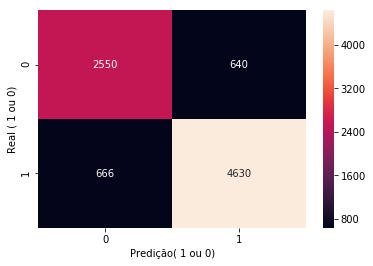

In [35]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [38]:
y_proba = clf.predict_proba(X_teste)[:,1]
roc_auc = roc_auc_score(Y_teste, y_proba)
roc_auc

0.9093129966189659

In [39]:
print(classification_report(Y_teste, y_proba>0.5))

             precision    recall  f1-score   support

          0       0.79      0.80      0.80      3190
          1       0.88      0.87      0.88      5296

avg / total       0.85      0.85      0.85      8486



# Austando o RandomForestClassifier.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf = RandomForestClassifier(criterion='entropy',class_weight='balanced',max_features="log2",
                             n_estimators=350,max_depth=20, random_state=42)
clf.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=20, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=350, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [48]:
y_pred = clf.predict(X_teste)

Text(33,0.5,'Real ( 1 ou 0)')

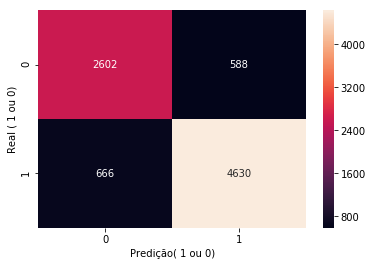

In [49]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [50]:
y_proba = clf.predict_proba(X_teste)[:,1]
roc_auc = roc_auc_score(Y_teste, y_proba)
roc_auc

0.9127518609893076

In [51]:
print(classification_report(Y_teste, y_proba>0.5))

             precision    recall  f1-score   support

          0       0.80      0.82      0.81      3190
          1       0.89      0.87      0.88      5296

avg / total       0.85      0.85      0.85      8486



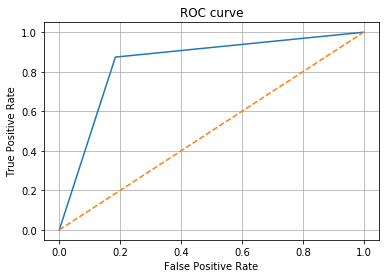

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(Y_teste, y_pred)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

 - Visualizando árvore de decisão de baixa profundidade.

In [56]:
# from sklearn.tree import plot_tree


# plt.figure(figsize=(20,10))
# annotations = plot_tree(clf.estimators_[0],
#                         feature_names=dados_ml.drop('conclusao',axis=1).columns,
#                         filled=True)

 - Salvando o modelo

In [85]:
import pickle

output = open('classificacao_assalto', 'wb')
pickle.dump(clf, output)
output.close()